In [52]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import seaborn as sns

In [53]:
my_data = pd.read_csv('C:/Users/inuhm/Bank customer churn prediction/Banking_churn_prediction.csv',encoding='ansi' )
my_data

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     2101   66    Male         0.0  self_employed   187.0   
1                2     2348   35    Male         0.0  self_employed     NaN   
2                4     2194   31    Male         0.0       salaried   146.0   
3                5     2329   90     NaN         NaN  self_employed  1020.0   
4                6     1579   42    Male         2.0  self_employed  1494.0   
5                7     1923   42  Female         0.0  self_employed  1096.0   
6                8     2048   72    Male         0.0        retired  1020.0   
7                9     2009   46    Male         0.0  self_employed   623.0   
8               10     2053   31    Male         0.0       salaried  1096.0   
9               11     2295   40    Male         3.0  self_employed  1020.0   
10              12     2389   68    Male         0.0        retired   409.0   
11              13     2293   32    Male         0.0       salaried  1096.0   
12              14     2211   73    Male         0.0        retired    44.0   
13              15     1660   50    Male         0.0       salaried   409.0   
14              16     1917   48  Female         0.0  self_employed   665.0   
15              17     1516   51  Female         0.0  self_employed  1232.0   
16              19     2293   49    Male         0.0  self_employed  1125.0   
17              20     2131   52  Female         0.0  self_employed  1096.0   
18              21     2102   47  Female         1.0  self_employed   146.0   
19              22     2181   41  Female         0.0  self_employed  1020.0   
20              23     1548   45    Male         0.0  self_employed  1020.0   
21              24     2440   29  Female         0.0  self_employed  1020.0   
22              25     2105   41  Female         0.0  self_employed   905.0   
23              26     1751   34    Male         0.0  self_employed   931.0   
24              27     2151   48    Male         2.0       salaried   218.0   
25              28     2271   76    Male         NaN  self_employed  1533.0   
26              29     1878   36    Male         2.0  self_employed  1563.0   
27              30     2430   56    Male         0.0  self_employed   836.0   
28              31     2189   55    Male         0.0  self_employed   118.0   
29              32     2060   33  Female         0.0       salaried   834.0   
...            ...      ...  ...     ...         ...            ...     ...   
28352        30271     1941   29  Female         0.0  self_employed  1020.0   
28353        30272     2150   25  Female         0.0        student  1589.0   
28354        30273     2106   65  Female         NaN  self_employed   243.0   
28355        30274     2182   45    Male         2.0  self_employed  1540.0   
28356        30275     2371   47    Male         2.0  self_employed   231.0   
28357        30276     2159   40    Male         1.0  self_employed  1020.0   
28358        30277     2166   36    Male         0.0  self_employed  1020.0   
28359        30278     2277   39    Male         0.0       salaried   409.0   
28360        30280     1598   41  Female         0.0  self_employed   834.0   
28361        30281     1333   45    Male         0.0       salaried   575.0   
28362        30282     2228   26    Male         0.0        student   146.0   
28363        30283     1806   26  Female         0.0        student   334.0   
28364        30284     1704   72    Male         0.0  self_employed   656.0   
28365        30285     2188   35    Male         0.0  self_employed   223.0   
28366        30286     2322   90     NaN         0.0  self_employed   485.0   
28367        30287     2272   34  Female         0.0  self_employed   409.0   
28368        30288     2266   78  Female         NaN  self_employed   362.0   
28369        30289     1999   28    Male         0.0  self_employed  1437.0   
28370        30290     1913   71  Female         0.0  sel

In [54]:
my_data.describe()

customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2091.144105     48.208336      0.347236    796.109576   
std     8746.454456    272.676775     17.807163      0.997661    432.872102   
min        1.000000     73.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2154.000000     46.000000      0.000000    834.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   1096.000000   
max    30301.000000   2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean               2.225530    925.975019     7.380552e+03   
std                0.660443    937.799129     4.259871e+04   
min                1.000000      1.000000    -5.503960e+03   
25%                2.000000    176.000000     1.784470e+03   
50%                2.000000    572.000000     3.281255e+03   
75%                3.000000   1440.000000     6.635820e+03   
max                3.000000   4782.000000     5.905904e+06   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                2.838200e+04                   2.838200e+04   
mean                 7.495771e+03                   7.496780e+03   
std                  4.252935e+04                   4.172622e+04   
min                 -3.149570e+03                   1.428690e+03   
25%                  1.906000e+03                   2.180945e+03   
50%                  3.379915e+03                   3.542865e+03   
75%                  6.656535e+03                   6.666887e+03   
max                  5.740439e+06                   5.700290e+06   

       average_monthly_balance_prevQ2  current_month_credit  \
count                    2.838200e+04          2.838200e+04   
mean                     7.124209e+03          3.433252e+03   
std                      4.457581e+04          7.707145e+04   
min                     -1.650610e+04          1.000000e-02   
25%                      1.832507e+03          3.100000e-01   
50%                      3.359600e+03          6.100000e-01   
75%                      6.517960e+03          7.072725e+02   
max                      5.010170e+06          1.226985e+07   

       previous_month_credit  current_month_debit  previous_month_debit  \
count           2.838200e+04         2.838200e+04          2.838200e+04   
mean            3.261694e+03         3.658745e+03          3.339761e+03   
std             2.968889e+04         5.198542e+04          2.430111e+04   
min             1.000000e-02         1.000000e-02          1.000000e-02   
25%             3.300000e-01         4.100000e-01          4.100000e-01   
50%             6.300000e-01         9.193000e+01          1.099600e+02   
75%             7.492350e+02         1.360435e+03          1.357553e+03   
max             2.361808e+06         7.637857e+06          1.414168e+06   

       current_month_balance  previous_month_balance         churn  
count           2.838200e+04            2.838200e+04  28382.000000  
mean            7.451133e+03            7.495177e+03      0.185329  
std             4.203394e+04            4.243198e+04      0.388571  
min            -3.374180e+03           -5.171920e+03      0.000000  
25%             1.996765e+03            2.074408e+03      0.000000  
50%             3.447995e+03            3.465235e+03      0.000000  
75%             6.667958e+03            6.654693e+03      0.000000  
max             5.778185e+06            5.720144e+06      1.000000

In [55]:
my_data.drop('customer_id',axis=1,inplace=True)
my_data.drop('city',axis=1,inplace=True)
my_data.drop('last_transaction',axis=1,inplace=True)

my_data

vintage  age  gender  dependents     occupation  customer_nw_category  \
0         2101   66    Male         0.0  self_employed                     2   
1         2348   35    Male         0.0  self_employed                     2   
2         2194   31    Male         0.0       salaried                     2   
3         2329   90     NaN         NaN  self_employed                     2   
4         1579   42    Male         2.0  self_employed                     3   
5         1923   42  Female         0.0  self_employed                     2   
6         2048   72    Male         0.0        retired                     1   
7         2009   46    Male         0.0  self_employed                     2   
8         2053   31    Male         0.0       salaried                     2   
9         2295   40    Male         3.0  self_employed                     2   
10        2389   68    Male         0.0        retired                     3   
11        2293   32    Male         0.0       salaried                     1   
12        2211   73    Male         0.0        retired                     3   
13        1660   50    Male         0.0       salaried                     1   
14        1917   48  Female         0.0  self_employed                     2   
15        1516   51  Female         0.0  self_employed                     3   
16        2293   49    Male         0.0  self_employed                     3   
17        2131   52  Female         0.0  self_employed                     2   
18        2102   47  Female         1.0  self_employed                     1   
19        2181   41  Female         0.0  self_employed                     2   
20        1548   45    Male         0.0  self_employed                     2   
21        2440   29  Female         0.0  self_employed                     2   
22        2105   41  Female         0.0  self_employed                     2   
23        1751   34    Male         0.0  self_employed                     2   
24        2151   48    Male         2.0       salaried                     2   
25        2271   76    Male         NaN  self_employed                     3   
26        1878   36    Male         2.0  self_employed                     1   
27        2430   56    Male         0.0  self_employed                     3   
28        2189   55    Male         0.0  self_employed                     1   
29        2060   33  Female         0.0       salaried                     2   
...        ...  ...     ...         ...            ...                   ...   
28352     1941   29  Female         0.0  self_employed                     2   
28353     2150   25  Female         0.0        student                     2   
28354     2106   65  Female         NaN  self_employed                     2   
28355     2182   45    Male         2.0  self_employed                     1   
28356     2371   47    Male         2.0  self_employed                     2   
28357     2159   40    Male         1.0  self_employed                     2   
28358     2166   36    Male         0.0  self_employed                     2   
28359     2277   39    Male         0.0       salaried                     3   
28360     1598   41  Female         0.0  self_employed                     3   
28361     1333   45    Male         0.0       salaried                     2   
28362     2228   26    Male         0.0        student                     3   
28363     1806   26  Female         0.0        student                     2   
28364     1704   72    Male         0.0  self_employed                     2   
28365     2188   35    Male         0.0  self_employed                     2   
28366     2322   90     NaN         0.0  self_employed                     2   
28367     2272   34  Female         0.0  self_employed                     3   
28368     2266   78  Female         NaN  self_employed                     2   
28369     1999   28    Male         0.0  self_employed                     2   
28370  

In [56]:
my_data.dropna(axis=0,inplace=True)
my_data

vintage  age  gender  dependents     occupation  customer_nw_category  \
0         2101   66    Male         0.0  self_employed                     2   
1         2348   35    Male         0.0  self_employed                     2   
2         2194   31    Male         0.0       salaried                     2   
4         1579   42    Male         2.0  self_employed                     3   
5         1923   42  Female         0.0  self_employed                     2   
6         2048   72    Male         0.0        retired                     1   
7         2009   46    Male         0.0  self_employed                     2   
8         2053   31    Male         0.0       salaried                     2   
9         2295   40    Male         3.0  self_employed                     2   
10        2389   68    Male         0.0        retired                     3   
11        2293   32    Male         0.0       salaried                     1   
12        2211   73    Male         0.0        retired                     3   
13        1660   50    Male         0.0       salaried                     1   
14        1917   48  Female         0.0  self_employed                     2   
15        1516   51  Female         0.0  self_employed                     3   
16        2293   49    Male         0.0  self_employed                     3   
17        2131   52  Female         0.0  self_employed                     2   
18        2102   47  Female         1.0  self_employed                     1   
19        2181   41  Female         0.0  self_employed                     2   
20        1548   45    Male         0.0  self_employed                     2   
21        2440   29  Female         0.0  self_employed                     2   
22        2105   41  Female         0.0  self_employed                     2   
23        1751   34    Male         0.0  self_employed                     2   
24        2151   48    Male         2.0       salaried                     2   
26        1878   36    Male         2.0  self_employed                     1   
27        2430   56    Male         0.0  self_employed                     3   
28        2189   55    Male         0.0  self_employed                     1   
29        2060   33  Female         0.0       salaried                     2   
30        2231   66    Male         0.0        retired                     1   
31        1651   64  Female         0.0        retired                     1   
...        ...  ...     ...         ...            ...                   ...   
28349      845   58    Male         0.0  self_employed                     3   
28350     2079   32  Female         0.0  self_employed                     2   
28351     2150   40    Male         0.0       salaried                     2   
28352     1941   29  Female         0.0  self_employed                     2   
28353     2150   25  Female         0.0        student                     2   
28355     2182   45    Male         2.0  self_employed                     1   
28356     2371   47    Male         2.0  self_employed                     2   
28357     2159   40    Male         1.0  self_employed                     2   
28358     2166   36    Male         0.0  self_employed                     2   
28359     2277   39    Male         0.0       salaried                     3   
28360     1598   41  Female         0.0  self_employed                     3   
28361     1333   45    Male         0.0       salaried                     2   
28362     2228   26    Male         0.0        student                     3   
28363     1806   26  Female         0.0        student                     2   
28364     1704   72    Male         0.0  self_employed                     2   
28365     2188   35    Male         0.0  self_employed                     2   
28367     2272   34  Female         0.0  self_employed                     3   
28369     1999   28    Male         0.0  self_employed                     2   
28370  

In [57]:
le = preprocessing.LabelEncoder()
my_data['gender']=le.fit_transform(my_data['gender'])
my_data['occupation']=le.fit_transform(my_data['occupation'])
my_data

vintage  age  gender  dependents  occupation  customer_nw_category  \
0         2101   66       1         0.0           3                     2   
1         2348   35       1         0.0           3                     2   
2         2194   31       1         0.0           2                     2   
4         1579   42       1         2.0           3                     3   
5         1923   42       0         0.0           3                     2   
6         2048   72       1         0.0           1                     1   
7         2009   46       1         0.0           3                     2   
8         2053   31       1         0.0           2                     2   
9         2295   40       1         3.0           3                     2   
10        2389   68       1         0.0           1                     3   
11        2293   32       1         0.0           2                     1   
12        2211   73       1         0.0           1                     3   
13        1660   50       1         0.0           2                     1   
14        1917   48       0         0.0           3                     2   
15        1516   51       0         0.0           3                     3   
16        2293   49       1         0.0           3                     3   
17        2131   52       0         0.0           3                     2   
18        2102   47       0         1.0           3                     1   
19        2181   41       0         0.0           3                     2   
20        1548   45       1         0.0           3                     2   
21        2440   29       0         0.0           3                     2   
22        2105   41       0         0.0           3                     2   
23        1751   34       1         0.0           3                     2   
24        2151   48       1         2.0           2                     2   
26        1878   36       1         2.0           3                     1   
27        2430   56       1         0.0           3                     3   
28        2189   55       1         0.0           3                     1   
29        2060   33       0         0.0           2                     2   
30        2231   66       1         0.0           1                     1   
31        1651   64       0         0.0           1                     1   
...        ...  ...     ...         ...         ...                   ...   
28349      845   58       1         0.0           3                     3   
28350     2079   32       0         0.0           3                     2   
28351     2150   40       1         0.0           2                     2   
28352     1941   29       0         0.0           3                     2   
28353     2150   25       0         0.0           4                     2   
28355     2182   45       1         2.0           3                     1   
28356     2371   47       1         2.0           3                     2   
28357     2159   40       1         1.0           3                     2   
28358     2166   36       1         0.0           3                     2   
28359     2277   39       1         0.0           2                     3   
28360     1598   41       0         0.0           3                     3   
28361     1333   45       1         0.0           2                     2   
28362     2228   26       1         0.0           4                     3   
28363     1806   26       0         0.0           4                     2   
28364     1704   72       1         0.0           3                     2   
28365     2188   35       1         0.0           3                     2   
28367     2272   34       0         0.0           3                     3   
28369     1999   28       1         0.0           3                     2   
28370     1913   71       0         0.0           3                     3   
28371     1763   32       0         0.0           2                     2   
283

In [58]:
my_data.churn.value_counts()

0    20892
1     4664
Name: churn, dtype: int64

In [59]:

eqalclassData =my_data.groupby('churn').apply(lambda x: x.sample(n=5000,replace=True)).reset_index(drop = True)
eqalclassData

vintage  age  gender  dependents  occupation  customer_nw_category  \
0        2104   23       1         0.0           4                     3   
1        2241   33       1         0.0           3                     2   
2        2347   33       1         2.0           3                     2   
3        2089   49       0         0.0           3                     2   
4        1800   84       1         0.0           3                     3   
5        2053   52       0         0.0           3                     3   
6        1991   41       1         0.0           2                     2   
7        2130   42       1         0.0           2                     2   
8        2005   55       0         2.0           3                     2   
9        1745   76       1         0.0           1                     3   
10       2319   44       0         0.0           3                     2   
11       2296   63       1         1.0           2                     1   
12       2175   64       0         0.0           1                     2   
13       2291   29       1         1.0           3                     2   
14       2235   43       0         0.0           3                     2   
15       1983   15       1         0.0           4                     1   
16       1955   34       1         0.0           3                     2   
17       2194   47       1         0.0           2                     3   
18       2042   44       1         0.0           2                     3   
19       2165   62       0         0.0           3                     3   
20       1959   26       0         0.0           4                     2   
21       2057   39       1         0.0           2                     1   
22       2035   51       1         0.0           3                     2   
23       2189   54       1         0.0           3                     3   
24       2176   22       0         0.0           4                     2   
25       2127   45       1         2.0           3                     3   
26       2188   36       1         2.0           3                     2   
27       2338   41       1         0.0           3                     3   
28       1493   48       1         3.0           3                     3   
29       2209   50       0         0.0           3                     2   
...       ...  ...     ...         ...         ...                   ...   
9970     2320   90       1         0.0           1                     2   
9971     2081   73       1         0.0           3                     3   
9972     1498   43       0         0.0           3                     2   
9973     2128   44       0         0.0           3                     2   
9974     2384   75       1         0.0           1                     1   
9975     2343   41       1         0.0           3                     1   
9976     1386   70       1         1.0           3                     3   
9977     2387   84       1         0.0           3                     2   
9978     2222   73       0         0.0           3                     3   
9979     2428   36       1         0.0           2                     2   
9980     2455   33       1         2.0           2                     2   
9981     1948   42       1         0.0           3                     2   
9982     2346   50       0         0.0           3                     2   
9983      641   54       0         2.0           3                     2   
9984     2428   90       1         0.0           3                     1   
9985     2317   31       1         0.0           2                     3   
9986     2217   65       1         1.0           3                     3   
9987     2223   57       1         0.0           3                     2   
9988     2244   14       0         0.0           4                     2   
9989     2227   51       1         2.0           3                     1   
9990     2106   31       0         0.0           3    

In [60]:
eqalclassData.churn.value_counts()

1    5000
0    5000
Name: churn, dtype: int64

In [61]:
DT_df=np.split(eqalclassData,[17],axis=1)
x=DT_df[0]
y=DT_df[1]
y

churn
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
...     ...
9970    1.0
9971    1.0
9972    1.0
9973    1.0
9974    1.0
9975    1.0
9976    1.0
9977    1.0
9978    1.0
9979    1.0
9980    1.0
9981    1.0
9982    1.0
9983    1.0
9984    1.0
9985    1.0
9986    1.0
9987    1.0
9988    1.0
9989    1.0
9990    1.0
9991    1.0
9992    1.0
9993    1.0
9994    1.0
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0

[10000 rows x 1 columns]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.60,random_state=4,stratify=y)
dtc_churn = DecisionTreeClassifier()
dtc_churn.fit(x_train,y_train)
predict_dtc = dtc_churn.predict(x_test)
metrics.accuracy_score(y_test,predict_dtc)

0.74950000000000006

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


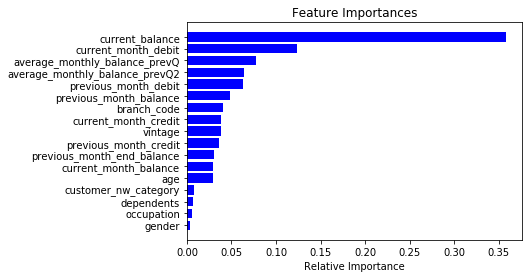

In [63]:
from sklearn.ensemble import RandomForestRegressor
randFmodel = RandomForestRegressor(random_state=1, max_depth=11)
randomFdata=pd.get_dummies(x)
randFmodel.fit(x,y)
featuresRandf = randomFdata.columns
importances = randFmodel.feature_importances_
indices = np.argsort(importances)[-17:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [featuresRandf[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [64]:
my_data=eqalclassData
my_data

vintage  age  gender  dependents  occupation  customer_nw_category  \
0        2104   23       1         0.0           4                     3   
1        2241   33       1         0.0           3                     2   
2        2347   33       1         2.0           3                     2   
3        2089   49       0         0.0           3                     2   
4        1800   84       1         0.0           3                     3   
5        2053   52       0         0.0           3                     3   
6        1991   41       1         0.0           2                     2   
7        2130   42       1         0.0           2                     2   
8        2005   55       0         2.0           3                     2   
9        1745   76       1         0.0           1                     3   
10       2319   44       0         0.0           3                     2   
11       2296   63       1         1.0           2                     1   
12       2175   64       0         0.0           1                     2   
13       2291   29       1         1.0           3                     2   
14       2235   43       0         0.0           3                     2   
15       1983   15       1         0.0           4                     1   
16       1955   34       1         0.0           3                     2   
17       2194   47       1         0.0           2                     3   
18       2042   44       1         0.0           2                     3   
19       2165   62       0         0.0           3                     3   
20       1959   26       0         0.0           4                     2   
21       2057   39       1         0.0           2                     1   
22       2035   51       1         0.0           3                     2   
23       2189   54       1         0.0           3                     3   
24       2176   22       0         0.0           4                     2   
25       2127   45       1         2.0           3                     3   
26       2188   36       1         2.0           3                     2   
27       2338   41       1         0.0           3                     3   
28       1493   48       1         3.0           3                     3   
29       2209   50       0         0.0           3                     2   
...       ...  ...     ...         ...         ...                   ...   
9970     2320   90       1         0.0           1                     2   
9971     2081   73       1         0.0           3                     3   
9972     1498   43       0         0.0           3                     2   
9973     2128   44       0         0.0           3                     2   
9974     2384   75       1         0.0           1                     1   
9975     2343   41       1         0.0           3                     1   
9976     1386   70       1         1.0           3                     3   
9977     2387   84       1         0.0           3                     2   
9978     2222   73       0         0.0           3                     3   
9979     2428   36       1         0.0           2                     2   
9980     2455   33       1         2.0           2                     2   
9981     1948   42       1         0.0           3                     2   
9982     2346   50       0         0.0           3                     2   
9983      641   54       0         2.0           3                     2   
9984     2428   90       1         0.0           3                     1   
9985     2317   31       1         0.0           2                     3   
9986     2217   65       1         1.0           3                     3   
9987     2223   57       1         0.0           3                     2   
9988     2244   14       0         0.0           4                     2   
9989     2227   51       1         2.0           3                     1   
9990     2106   31       0         0.0           3    

In [65]:
import scipy.io
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans
LLE = manifold.LocallyLinearEmbedding( n_components=2,n_neighbors=10)
LLE.fit(my_data)
manifold_2DaLLE = LLE.transform(my_data)
manifold_2DLLE = pd.DataFrame(manifold_2DaLLE, columns=['Componentlle 1', 'Componentlle 2'])

# Left with 2 dimensions
manifold_2DLLE.head()


Componentlle 1  Componentlle 2
0       -0.000331       -0.000992
1       -0.000339       -0.001014
2       -0.000325       -0.001490
3       -0.000297       -0.000918
4        0.000133       -0.000001

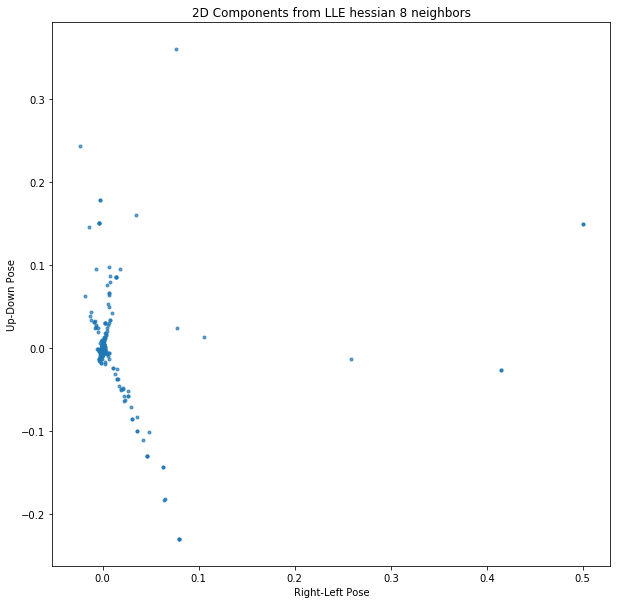

In [66]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from LLE hessian 8 neighbors')
ax.set_xlabel('Componentlle: 1')
ax.set_ylabel('Componentlle: 2')


# Show 2D components plot
ax.scatter(manifold_2DLLE['Componentlle 1'], manifold_2DLLE['Componentlle 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [67]:
#SpectralEmbedding implement
from sklearn.manifold import SpectralEmbedding
SE =manifold.SpectralEmbedding(n_components=2,n_neighbors=20)
SE.fit(my_data)
manifold_2DaSE = SE.fit_transform(my_data)
manifold_2DSE = pd.DataFrame(manifold_2DaSE, columns=['Componentse 1', 'Componentse 2'])

# Left with 2 dimensions
manifold_2DSE.head()

Componentse 1  Componentse 2
0      -0.027407      -0.033403
1      -0.040815       0.005677
2       0.033540      -0.061610
3      -0.037662      -0.026744
4      -0.042680      -0.000328

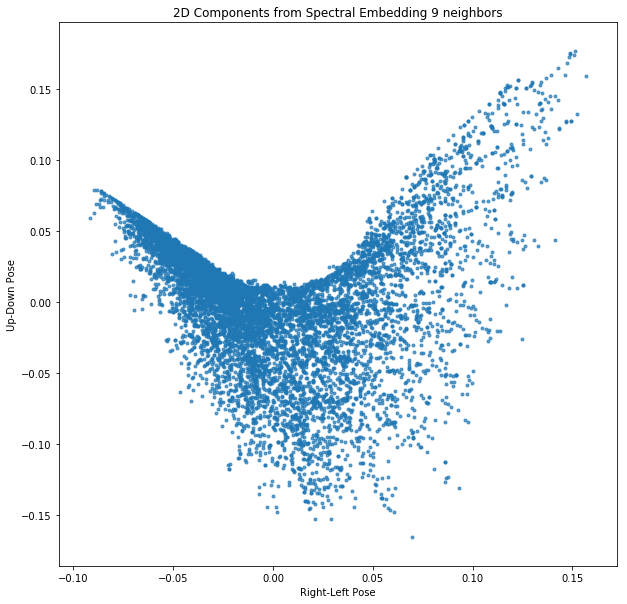

In [68]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Componentse: 1')
ax.set_ylabel('Componentse: 2')


# Show 2D components plot
ax.scatter(manifold_2DSE['Componentse 1'], manifold_2DSE['Componentse 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

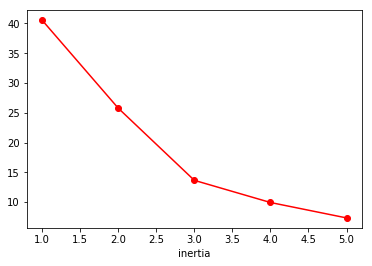

In [69]:
inertia_list=[]
for k in np.arange(1,6):
    lleinertia=KMeans(n_clusters=k)
    lleinertia.fit(manifold_2DSE)
    inertia_list.append(lleinertia.inertia_)

plt.plot(np.arange(1,6), inertia_list ,'ro-')
plt.xlabel("number of clusters")
plt.xlabel("inertia")
plt.show()



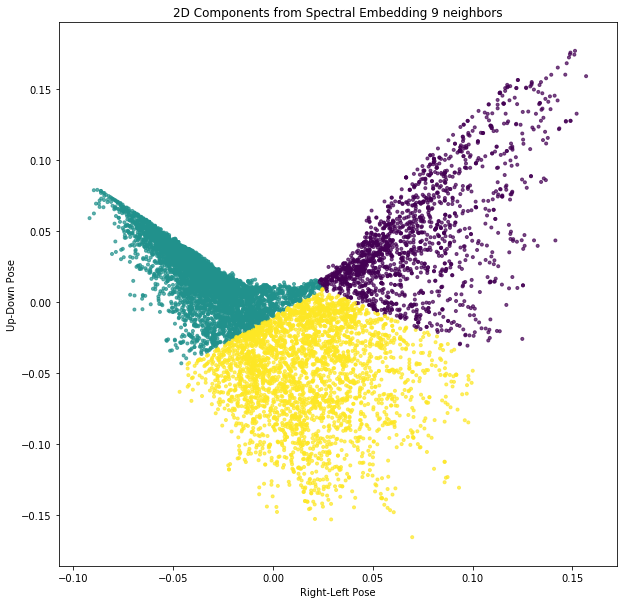

In [70]:
kmeansSE = KMeans(n_clusters=3, random_state=1)
kmeansSE.fit(manifold_2DSE)
labelSE=kmeansSE.predict(manifold_2DSE)#sthash.WiCJ4hD1.dpuf

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Componentllecome: 1')
ax.set_ylabel('Componentllecome: 2')


# Show 2D components plot
ax.scatter(manifold_2DSE.iloc[:,0].values, manifold_2DSE.iloc[:,1].values, c=labelSE ,marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

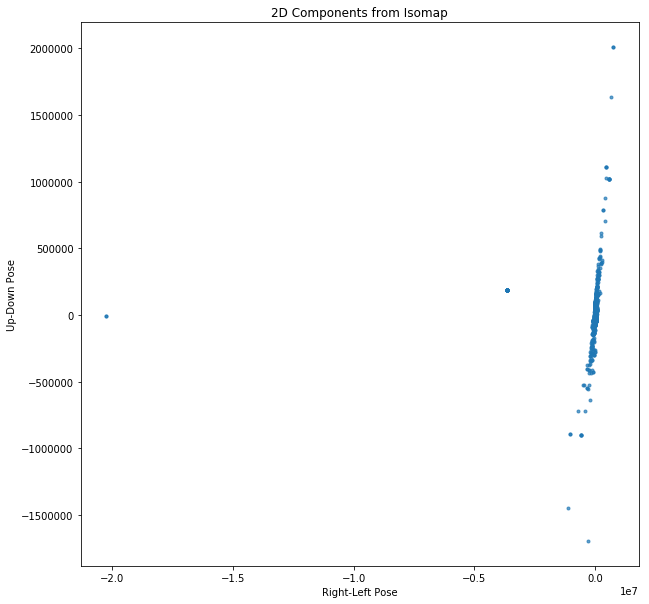

In [71]:
#isomap implement 
iso = manifold.Isomap(n_neighbors=4, n_components=2)
iso.fit(my_data)
manifold_2Da = iso.transform(my_data)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')


# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()


In [72]:
from sklearn.manifold import TSNE
TsneModel=  manifold.TSNE(n_components=2)
Manifold2dTSNE=TsneModel.fit_transform(my_data) 
Manifold2dTSNEdf = pd.DataFrame(Manifold2dTSNE, columns=['Component 1', 'Component 2'])

In [73]:
Manifold2dTSNEdf

Component 1  Component 2
0       27.478458    68.113258
1      -19.931620    42.312244
2       66.958275   -14.555746
3       16.019388    59.238331
4       -1.885832    62.794479
5       13.814336    72.847572
6        2.587817    34.313126
7        0.679794    34.852894
8      -44.714783     1.144895
9       60.288593   -35.208965
10      69.301262   -16.521753
11      -4.293255   -20.753128
12      62.598999    43.975670
13      54.014042    25.327568
14      71.384430   -23.975105
15     -69.368286    53.340641
16      51.237202   -62.232925
17     -71.198967    39.085365
18      46.104389    25.647230
19      30.621113    37.369335
20     -53.090153    45.146435
21       7.166827   -78.389389
22     -67.052315    53.742004
23      49.742504   -68.704979
24      17.116835    -3.270710
25      -2.629041    38.870098
26      32.552395     7.092044
27      17.332125    26.306112
28     -62.080807   -23.645842
29     -30.136909    29.119116
...           ...          ...
9970   -56.542156   -52.479748
9971    53.395096    12.765841
9972    47.236134   -47.332287
9973   -57.903728     1.209026
9974     1.947069   -27.804253
9975    10.256922   -74.083008
9976   -71.069519    -2.253345
9977    59.858105    47.595997
9978   -56.127407   -15.740411
9979    28.453825    64.550873
9980   -48.130322   -10.291169
9981    45.668976   -40.584579
9982    -0.817468   -16.485580
9983     0.694253    -7.415021
9984   -43.761208   -62.052437
9985   -41.184364     4.620538
9986     8.969656    11.207781
9987    47.777946    40.051712
9988    -2.153812   -19.153954
9989   -24.735275    54.561954
9990    70.403999    21.571100
9991   -64.812149    18.716911
9992    -0.245590   -35.047325
9993   -51.377010     0.597690
9994    50.493801   -53.654537
9995   -36.006092    30.887079
9996   -17.420958     5.177093
9997   -49.054703   -53.899082
9998   -51.376072     0.597594
9999   -31.147146   -14.401344

[10000 rows x 2 columns]

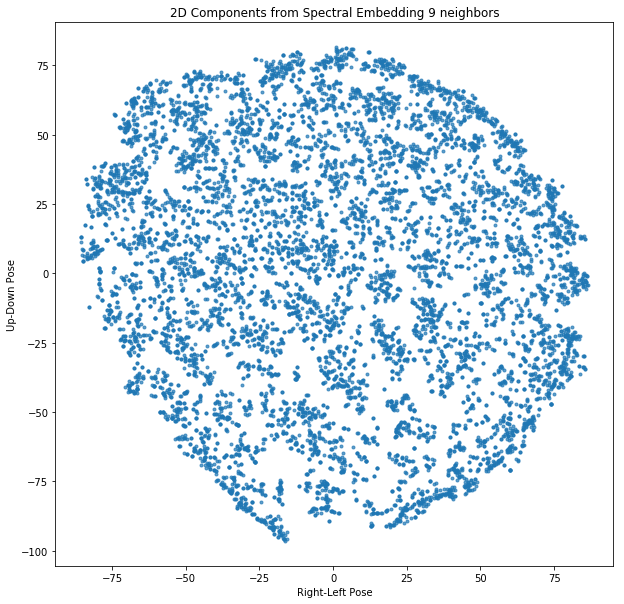

In [74]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')


# Show 2D components plot
ax.scatter(Manifold2dTSNEdf['Component 1'], Manifold2dTSNEdf['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

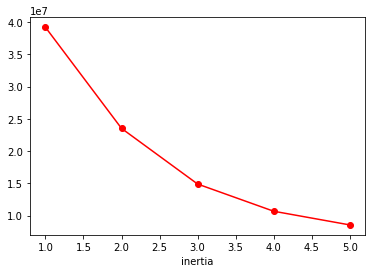

In [75]:
inertia_listtsne=[]
for k in np.arange(1,6):
    tsneinertia=KMeans(n_clusters=k)
    tsneinertia.fit(Manifold2dTSNEdf)
    inertia_listtsne.append(tsneinertia.inertia_)

plt.plot(np.arange(1,6), inertia_listtsne ,'ro-')
plt.xlabel("number of clusters")
plt.xlabel("inertia")
plt.show()



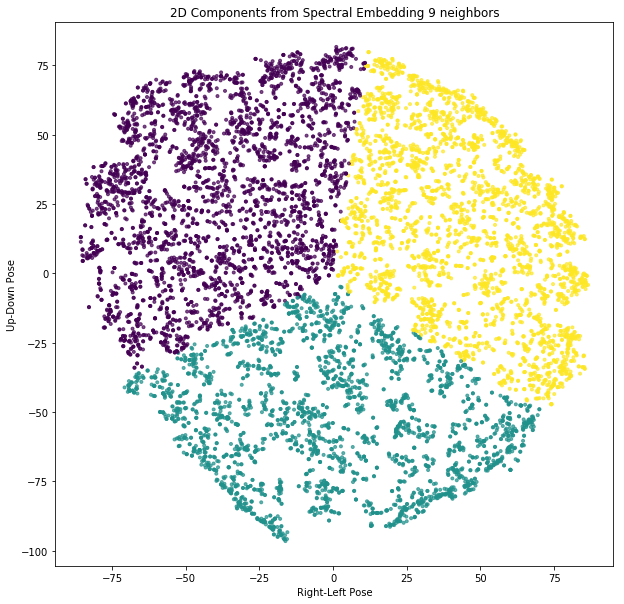

In [76]:
kmeansTSNE = KMeans(n_clusters=3, random_state=1)
kmeansTSNE.fit(Manifold2dTSNEdf)
labelTSNE=kmeansTSNE.predict(Manifold2dTSNEdf)#sthash.WiCJ4hD1.dpuf

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Componentllecome: 1')
ax.set_ylabel('Componentllecome: 2')


# Show 2D components plot
ax.scatter(Manifold2dTSNEdf['Component 1'], Manifold2dTSNEdf['Component 2'], c=labelTSNE ,marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [80]:
my_data['cluster']=labelTSNE
my_data

vintage  age  gender  dependents  occupation  customer_nw_category  \
0        2104   23       1         0.0           4                     3   
1        2241   33       1         0.0           3                     2   
2        2347   33       1         2.0           3                     2   
3        2089   49       0         0.0           3                     2   
4        1800   84       1         0.0           3                     3   
5        2053   52       0         0.0           3                     3   
6        1991   41       1         0.0           2                     2   
7        2130   42       1         0.0           2                     2   
8        2005   55       0         2.0           3                     2   
9        1745   76       1         0.0           1                     3   
10       2319   44       0         0.0           3                     2   
11       2296   63       1         1.0           2                     1   
12       2175   64       0         0.0           1                     2   
13       2291   29       1         1.0           3                     2   
14       2235   43       0         0.0           3                     2   
15       1983   15       1         0.0           4                     1   
16       1955   34       1         0.0           3                     2   
17       2194   47       1         0.0           2                     3   
18       2042   44       1         0.0           2                     3   
19       2165   62       0         0.0           3                     3   
20       1959   26       0         0.0           4                     2   
21       2057   39       1         0.0           2                     1   
22       2035   51       1         0.0           3                     2   
23       2189   54       1         0.0           3                     3   
24       2176   22       0         0.0           4                     2   
25       2127   45       1         2.0           3                     3   
26       2188   36       1         2.0           3                     2   
27       2338   41       1         0.0           3                     3   
28       1493   48       1         3.0           3                     3   
29       2209   50       0         0.0           3                     2   
...       ...  ...     ...         ...         ...                   ...   
9970     2320   90       1         0.0           1                     2   
9971     2081   73       1         0.0           3                     3   
9972     1498   43       0         0.0           3                     2   
9973     2128   44       0         0.0           3                     2   
9974     2384   75       1         0.0           1                     1   
9975     2343   41       1         0.0           3                     1   
9976     1386   70       1         1.0           3                     3   
9977     2387   84       1         0.0           3                     2   
9978     2222   73       0         0.0           3                     3   
9979     2428   36       1         0.0           2                     2   
9980     2455   33       1         2.0           2                     2   
9981     1948   42       1         0.0           3                     2   
9982     2346   50       0         0.0           3                     2   
9983      641   54       0         2.0           3                     2   
9984     2428   90       1         0.0           3                     1   
9985     2317   31       1         0.0           2                     3   
9986     2217   65       1         1.0           3                     3   
9987     2223   57       1         0.0           3                     2   
9988     2244   14       0         0.0           4                     2   
9989     2227   51       1         2.0           3                     1   
9990     2106   31       0         0.0           3    

In [81]:

behavioralCluster1=my_data.loc[my_data['cluster'] ==0]
behavioralCluster2=my_data.loc[my_data['cluster'] ==1]
behavioralCluster3=my_data.loc[my_data['cluster'] ==2]
behavioralCluster1.drop('cluster',axis=1,inplace=True)
behavioralCluster2.drop('cluster',axis=1,inplace=True)
behavioralCluster3.drop('cluster',axis=1,inplace=True)
my_data.drop('cluster',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [82]:
behavioralCluster3.describe()


vintage          age       gender   dependents   occupation  \
count  3233.000000  3233.000000  3233.000000  3233.000000  3233.000000   
mean   2087.026601    47.705227     0.613981     0.308073     2.673987   
std     279.276722    16.576201     0.486910     0.788053     0.715455   
min     469.000000     3.000000     0.000000     0.000000     0.000000   
25%    1942.000000    36.000000     0.000000     0.000000     2.000000   
50%    2155.000000    46.000000     1.000000     0.000000     3.000000   
75%    2289.000000    59.000000     1.000000     0.000000     3.000000   
max    2473.000000    90.000000     1.000000     6.000000     4.000000   

       customer_nw_category  branch_code  current_balance  \
count           3233.000000  3233.000000      3233.000000   
mean               2.214043   924.046087      6301.843817   
std                0.624352   926.581197      4224.485410   
min                1.000000     1.000000         0.700000   
25%                2.000000   179.000000      3871.270000   
50%                2.000000   577.000000      5376.880000   
75%                3.000000  1450.000000      7912.320000   
max                3.000000  4460.000000     70410.950000   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                 3233.000000                    3233.000000   
mean                  6381.171670                    6327.441423   
std                   3114.952088                    2989.378674   
min                      0.410000                    1443.860000   
25%                   4128.300000                    4147.730000   
50%                   5749.660000                    5538.450000   
75%                   8201.760000                    7835.980000   
max                  21371.640000                   23063.050000   

       average_monthly_balance_prevQ2  current_month_credit  \
count                     3233.000000           3233.000000   
mean                      5637.465060           1088.103798   
std                       3508.051185           2735.516002   
min                      -2278.510000              0.010000   
25%                       3290.590000              0.330000   
50%                       4910.930000              0.630000   
75%                       7530.750000            714.330000   
max                      21594.090000          23646.690000   

       previous_month_credit  current_month_debit  previous_month_debit  \
count            3233.000000          3233.000000           3233.000000   
mean              853.793310          1370.835809            832.468893   
std              2051.387822          2647.197227           1712.452296   
min                 0.010000             0.010000              0.010000   
25%                 0.310000             0.430000              0.400000   
50%                 0.630000           142.890000             65.420000   
75%               629.030000          1443.360000            860.830000   
max             23240.150000         22864.830000          22136.330000   

       current_month_balance  previous_month_balance        churn  
count            3233.000000             3233.000000  3233.000000  
mean             6275.437188             6339.599165     0.360037  
std              3216.365352             3127.722178     0.480085  
min               257.690000                4.980000     0.000000  
25%              4066.340000             4092.110000     0.000000  
50%              5437.040000             5680.900000     0.000000  
75%              7735.370000             8183.220000     1.000000  
max             32361.810000            27293.320000     1.000000

In [83]:
#step 1 : accuracy for behavioural cluster 1 
Tempdf1=np.split(behavioralCluster1,[17],axis=1)
x_C1=Tempdf1[0]
y_C1=Tempdf1[1]

 
x_C1_train,x_C1_test,y_C1_train,y_C1_test =train_test_split(x_C1,y_C1,test_size=0.60,random_state=4,stratify=y_C1)
dtc_churn_C1 = DecisionTreeClassifier()
dtc_churn_C1.fit(x_C1_train,y_C1_train)
predict_dtc_C1 = dtc_churn_C1.predict(x_C1_test)
metrics.accuracy_score(y_C1_test,predict_dtc_C1)

0.77647058823529413

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


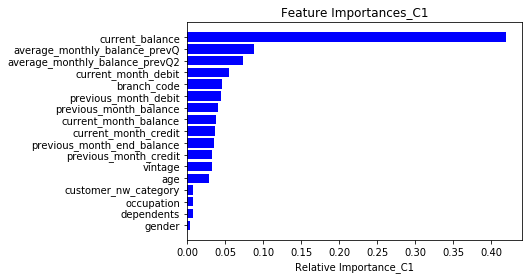

In [84]:
#step 2 : finding the main feature
randFmodel_C1 = RandomForestRegressor(random_state=1, max_depth=11)
randomFdata_C1=pd.get_dummies(x_C1)
randFmodel_C1.fit(x_C1,y_C1)
featuresRandf_C1 = randomFdata_C1.columns
importances_C1 = randFmodel_C1.feature_importances_
indices_C1 = np.argsort(importances_C1)[-17:]  # top 17 features


plt.title('Feature Importances_C1')
plt.barh(range(len(indices_C1)), importances_C1[indices_C1], color='b', align='center')
plt.yticks(range(len(indices_C1)), [featuresRandf_C1[i] for i in indices_C1])
plt.xlabel('Relative Importance_C1')
plt.show()


In [109]:
#step 3 : removing shado effect of main feature then calculate the accuracy on wrog data
y_C1_test['preds'] = predict_dtc_C1
MergedTempDf_C1 = pd.merge(y_C1_test,y_C1_test[['preds']],how = 'left',left_index = True, right_index = True)
WrongPredictedTempDf_C1=MergedTempDf_C1.loc[MergedTempDf_C1['churn'] !=MergedTempDf_C1['preds_y']]
WrongPredictedTempDf_C1.drop('churn',axis=1,inplace=True)
behavioralCluster1_Nonshadow = pd.concat([WrongPredictedTempDf_C1, behavioralCluster1], axis=1)
behavioralCluster1_Nonshadow.dropna(axis=0,inplace=True)
behavioralCluster1_Nonshadow.drop('preds_x',axis=1,inplace=True)
behavioralCluster1_Nonshadow.drop('preds_y',axis=1,inplace=True)
behavioralCluster1_Nonshadow.drop('current_balance',axis=1,inplace=True)

Tempdf1_1=np.split(behavioralCluster1_Nonshadow,[16],axis=1)
x_C1_1=Tempdf1_1[0]
y_C1_1=Tempdf1_1[1]

 
x_C1_1_train, x_C1_1_test, y_C1_1_train, y_C1_1_test =train_test_split(x_C1_1,y_C1_1,test_size=0.60,random_state=4,stratify=y_C1_1)

dtc_churn_C1_1 = DecisionTreeClassifier()
dtc_churn_C1_1.fit(x_C1_1_train, y_C1_1_train)
predict_dtc_C1_1 = dtc_churn_C1_1.predict(x_C1_1_test)
metrics.accuracy_score(y_C1_1_test, predict_dtc_C1_1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.6262626262626263

In [106]:
# in this step shadow effect evaluate in 2 section : 
# at the first section rendom forest classifire implement on hole data and just 1 behavioural cluster.
#then in different random state with low data changing the featurese impact stablity campares.
 

In [111]:
behavioralCluster1_Nonshadow

vintage  age  gender  dependents  occupation  customer_nw_category  \
8        2005   55       0         2.0           3                     2   
36       2156   47       1         0.0           2                     1   
79       2407   53       0         0.0           2                     3   
108      2107   58       0         0.0           2                     3   
128      2111   10       0         0.0           3                     2   
194      2115   46       1         0.0           2                     2   
196      2320   31       0         0.0           4                     1   
214      2246   27       0         0.0           2                     3   
221      2150   41       1         3.0           3                     3   
224      1896   47       1         3.0           3                     3   
229      2144   68       1         0.0           3                     3   
257      1694   74       1         0.0           1                     2   
286      2050   72       0         0.0           2                     2   
329      2460   70       1         3.0           2                     2   
351      1989   39       0         0.0           3                     3   
365      1560   31       0         0.0           2                     2   
369      2400   56       0         0.0           2                     3   
376      1734   71       0         0.0           3                     2   
382      2198   67       1         0.0           3                     2   
416      2231   45       1         0.0           3                     3   
419      2451   30       1         0.0           2                     3   
447      1500   35       0         0.0           3                     3   
474      2365   42       1         2.0           2                     3   
501      2373   56       1         3.0           3                     3   
508      1980   38       0         0.0           3                     2   
514      1642   39       0         0.0           3                     2   
665      1617   28       0         0.0           3                     2   
722      2229   47       1         0.0           3                     2   
733      1839   78       1         0.0           1                     2   
739      2346   54       1         0.0           3                     2   
...       ...  ...     ...         ...         ...                   ...   
9290     2018   53       1         0.0           3                     2   
9306     1967   39       1         2.0           3                     3   
9307     1414   46       0         0.0           3                     3   
9311     1830   29       0         0.0           4                     2   
9319     2461   47       1         0.0           3                     1   
9346     2189   59       1         2.0           3                     2   
9413     1788   68       1         0.0           3                     2   
9416     2318   63       1         0.0           3                     3   
9452     2444   29       1         0.0           3                     3   
9498     2187   36       0         0.0           3                     3   
9507     2352   60       0         0.0           3                     1   
9580     2227   57       1         0.0           2                     3   
9603     2357   49       1         0.0           3                     2   
9690     1629   44       0         0.0           3                     1   
9707     2407   48       1         1.0           3                     2   
9717     1740   29       1         0.0           2                     2   
9737     2131    9       1         0.0           4                     3   
9760     1905   68       0         0.0           3                     1   
9764     2310   24       1         0.0           4                     3   
9793     2113   52       1         1.0           3                     3   
9794     2144   39       1         0.0           2    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


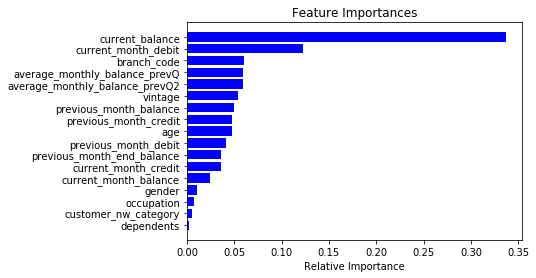

In [131]:
#before behaviour cluster:
sample_my_data=my_data.sample(n =800 , random_state =3)

T=np.split(sample_my_data,[17],axis=1)
X_1=T[0]
Y_1=T[1]


RF_my_data_model = RandomForestRegressor(random_state=1, max_depth=11)
RF_my_data_data = pd.get_dummies(X_1)

RF_my_data_model.fit(X_1,Y_1)
RF_my_data_features = RF_my_data_data.columns
RF_my_data_importances =RF_my_data_model.feature_importances_
RF_my_data_indices = np.argsort(RF_my_data_importances)[-17:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(RF_my_data_indices)), RF_my_data_importances[RF_my_data_indices], color='b', align='center')
plt.yticks(range(len(RF_my_data_indices)), [RF_my_data_features[i] for i in RF_my_data_indices])
plt.xlabel('Relative Importance')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


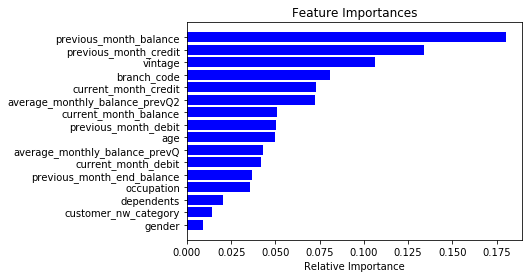

In [141]:
#after Behavioural cluster: 
sample_behavioralCluster1=behavioralCluster1_Nonshadow.sample(n =100 , random_state = 1,replace=True)

T1=np.split(sample_behavioralCluster1,[16],axis=1)
XC_1=T1[0]
YC_1=T1[1]


RF_behavioralCluster1_model = RandomForestRegressor(random_state=1, max_depth=11)
RF_behavioralCluster1_data = pd.get_dummies(XC_1)

RF_behavioralCluster1_model.fit(XC_1,YC_1)
RF_behavioralCluster1_features = RF_behavioralCluster1_data.columns
RF_behavioralCluster1_importances =RF_behavioralCluster1_model.feature_importances_
RF_behavioralCluster1_indices = np.argsort(RF_behavioralCluster1_importances)[-17:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(RF_behavioralCluster1_indices)), RF_behavioralCluster1_importances[RF_behavioralCluster1_indices], color='b', align='center')
plt.yticks(range(len(RF_behavioralCluster1_indices)), [RF_behavioralCluster1_features[i] for i in RF_behavioralCluster1_indices])
plt.xlabel('Relative Importance')
plt.show()
